[View in Colaboratory](https://colab.research.google.com/github/aunz/ds/blob/master/Function_approximation_with_NN.ipynb)

Given $x$ and its function $f(x)$, can we model $f(x)$ using neural network

## $f(x) = x^2$



In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from time import time

from sklearn.metrics import mean_squared_error

from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping


# init some data
np.random.seed(0)

X = np.random.rand(5000)
y = X ** 2

# define a scoring method, just root mean square error here
def score(preds, y_true = y, X = X, plot=True):
    if plot:
        plt.scatter(X, y_true, alpha=0.5, s=1, label='y true')
        plt.scatter(X, preds, alpha=0.5, s=1, label='y predicted')
        plt.xlabel('X')
        plt.ylabel('y')
        lgnd = plt.legend()
        lgnd.legendHandles[0]._sizes = [50]
        lgnd.legendHandles[1]._sizes = [50]
    return mean_squared_error(y_true, preds) ** .5


earlyStopping = [EarlyStopping(monitor='loss', patience=1, verbose=1)]

Epoch 00010: early stopping
1) 0.0750. Time: 14s
Epoch 00024: early stopping
2) 0.0748. Time: 23s
Epoch 00012: early stopping
3) 0.0748. Time: 15s
Epoch 00010: early stopping
4) 0.0748. Time: 14s
Epoch 00012: early stopping
5) 0.0749. Time: 15s
Epoch 00008: early stopping
6) 0.0748. Time: 13s
Epoch 00009: early stopping
7) 0.0748. Time: 13s
Epoch 00004: early stopping
8) 0.0749. Time: 10s
Epoch 00004: early stopping
16) 0.0757. Time: 10s
Epoch 00007: early stopping
32) 0.0750. Time: 12s
Epoch 00004: early stopping
64) 0.0748. Time: 10s
Epoch 00004: early stopping
128) 0.0749. Time: 10s
Epoch 00004: early stopping
256) 0.0749. Time: 10s
Epoch 00003: early stopping
512) 0.0751. Time: 11s
Epoch 00003: early stopping
1024) 0.0749. Time: 10s
CPU times: user 3min 28s, sys: 9.33 s, total: 3min 38s
Wall time: 3min 11s


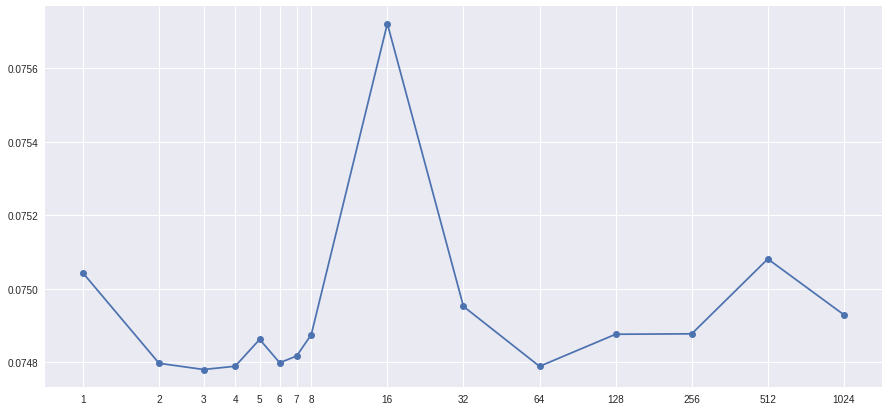

In [78]:
%%time
# tuning for number of neurons in the first hidden layer
# from tqdm import tqdm # for progress bar

scores = []
ranges = list(range(1, 8)) + [2 ** i for i in range(3, 11)]

for i in ranges:
    start = time()
    model = Sequential()
    model.add(Dense(i, input_shape=(1,)))
    model.add(Dense(1))

    model.compile(loss='mse', optimizer='adamax')
    model.fit(X, y, epochs=1000, callbacks=earlyStopping, verbose=0)

    s1 = score(model.predict(X), plot=0)
    time_taken = time() - start

    scores.append(s1)

    print(f'''{i}) {s1:.4f}. Time: {time_taken:.0f}s''')
    
plt.figure(figsize=(15, 7))
plt.plot(np.log2(ranges), scores, '-o')
plt.xticks(np.log2(ranges), ranges)

Epoch 00004: early stopping
1) 0.0750. Time: 9s
Epoch 00005: early stopping
2) 0.0748. Time: 10s
Epoch 00003: early stopping
3) 0.0769. Time: 9s
Epoch 00004: early stopping
4) 0.0859. Time: 10s
Epoch 00003: early stopping
5) 0.0784. Time: 10s
Epoch 00005: early stopping
6) 0.0850. Time: 12s
Epoch 00005: early stopping
7) 0.0786. Time: 13s
Epoch 00008: early stopping
8) 0.0749. Time: 18s
CPU times: user 1min 36s, sys: 4.56 s, total: 1min 40s
Wall time: 1min 31s


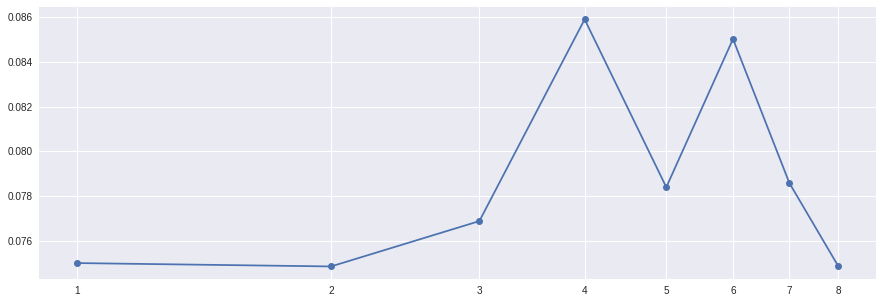

In [38]:
%%time
# tuning for number of hidden layers, each with 4 neurons

scores = []
models = []
ranges = list(range(1, 9))

for i in ranges:
    start = time()
    model = Sequential()
    model.add(Dense(4, input_shape=(1,)))
    for j in range(1, i): model.add(Dense(4))
    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop')
    model.fit(X, y, epochs=1000, callbacks=earlyStopping, verbose=0)
    models.append(model)

    s1 = score(model.predict(X), plot=0)
    scores.append(s1)
    time_taken = time() - start

    print(f'''{i}) {s1:.4f}. Time: {time_taken:.0f}s''')
    
plt.figure(figsize=(15, 5))
plt.plot(np.log2(ranges), scores, '-o')
plt.xticks(np.log2(ranges), ranges)

We see that NN can only predict a straight line here (green line)!

🙄

More work is needed

0.07484193476676694

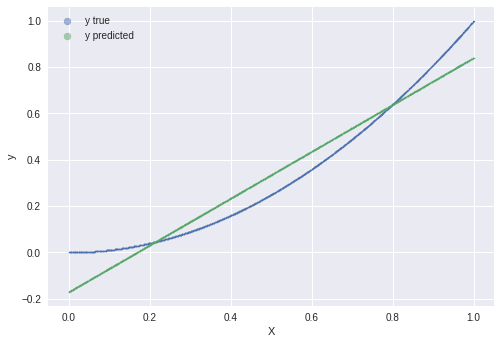

In [77]:
score(models[1].predict(X));